In [1]:
# Import Libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = 'https://raw.githubusercontent.com/slmsshk/pima-indians-diabetes.data.csv/main/pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(filename, names=names)
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1



#### **Overview of Pima Indian diabetes dataset**

-Preg	Number of times pregnant	Numeric	[0, 17]

-Gluc	Plasma glucose concentration at 2 Hours in an oral glucose tolerance test (GTIT)	Numeric	[0, 199]

-BP	Diastolic Blood Pressure (mm Hg)	Numeric	[0, 122]

-Skin	Triceps skin fold thickness (mm)	Numeric	[0, 99]

-Insulin	2-Hour Serum insulin (µh/ml)	Numeric	[0, 846]

-BMI	Body mass index [weight in kg/(Height in m)]	Numeric	[0, 67.1]

-DPF	Diabetes pedigree function	Numeric	[0.078, 2.42]

-Age	Age (years)	Numeric	[21, 81]

-Outcome	Binary value indicating non-diabetic /diabetic	Factor	[0,1]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Read the problematic columns ["preg","pedi", "age","class"] into separate dataframe df1
df1 = df.drop(["preg","pedi", "age","class"], axis = 1)
df1.head()

,plas,pres,skin,test,mass
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1


In [6]:
# Identify the rows with more than 3 zeros

rows_with_3plus_zeros = df1[(df1== 0).sum(axis=1) >= 3]
print("\n--- Rows with >= 3 Zeros ---")
print(rows_with_3plus_zeros)
print(len(rows_with_3plus_zeros))


--- Rows with >= 3 Zeros ---
     plas  pres  skin  test  mass
7     115     0     0     0  35.3
9     125    96     0     0   0.0
15    100     0     0     0  30.0
49    105     0     0     0   0.0
60     84     0     0     0   0.0
78    131     0     0     0  43.2
81     74     0     0     0   0.0
193   135     0     0     0  52.3
222   119     0     0     0  25.2
261   141     0     0     0  30.0
266   138     0     0     0  36.3
269   146     0     0     0  27.5
300   167     0     0     0  32.3
332   180     0     0     0  43.3
336   117     0     0     0  33.8
347   116     0     0     0  23.5
426    94     0     0     0   0.0
430    99     0     0     0  22.2
435   141     0     0     0  42.4
453   119     0     0     0  19.6
468   120     0     0     0  30.0
484   145     0     0     0  44.2
494    80     0     0     0   0.0
522   114     0     0     0   0.0
533    91     0     0     0  29.8
535   132     0     0     0  32.9
589    73     0     0     0  21.1
601    96     0   

In [7]:
# Read the index positions of those rows with more than 3 zeros in to a list zero_list
zero_list = rows_with_3plus_zeros.index.to_list()

In [8]:
# Drop those rows with more than 3 zeros and read the new table in to df2

df2 = df.drop(zero_list)
df2

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
# Now count the columnwise sum of zeros in df2
counts = (df2 == 0).sum()
counts

preg     101
plas       5
pres       2
skin     192
test     339
mass       2
pedi       0
age        0
class    481
dtype: int64

In [10]:
# Drop test column as about 50% are zeros.

df2.drop("test", axis =1, inplace = True)

In [11]:
df2

,preg,plas,pres,skin,mass,pedi,age,class
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,32.9,0.171,63,0
764,2,122,70,27,36.8,0.340,27,0
765,5,121,72,23,26.2,0.245,30,0
766,1,126,60,0,30.1,0.349,47,1


In [12]:
# Now count again column-wise sum of zeros.
(df2 == 0).sum()

preg     101
plas       5
pres       2
skin     192
mass       2
pedi       0
age        0
class    481
dtype: int64

In [13]:
# Replace the zeros with NaN values in plas, pres, skin, mass, pedi columns
invalid_zero_cols = ["plas", "pres", "skin","mass"]
df2[invalid_zero_cols] = df2[invalid_zero_cols].replace(0, pd.NA)
df2.isnull().sum()

preg       0
plas       5
pres       2
skin     192
mass       2
pedi       0
age        0
class      0
dtype: int64

In [14]:
# Replace the zeros with NaN values in plas, pres, skin, mass, pedi columns

median_plas = df2["plas"].median()
df2["plas"] = df2["plas"].fillna(median_plas)
median_pres = df2["pres"].median()
df2["pres"] = df2["pres"].fillna(median_pres)
median_skin = df2["skin"].median()
df2["skin"] = df2["skin"].fillna(median_skin)
median_mass = df2["mass"].median()
df2["mass"] = df2["mass"].fillna(median_mass)
df2.isnull().sum()

C:\Users\shiva\AppData\Local\Temp\ipykernel_9592\165647314.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2["plas"] = df2["plas"].fillna(median_plas)
C:\Users\shiva\AppData\Local\Temp\ipykernel_9592\165647314.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2["pres"] = df2["pres"].fillna(median_pres)
C:\Users\shiva\AppData\Local\Temp\ipykernel_9592\165647314.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in

preg     0
plas     0
pres     0
skin     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [15]:
# Write to file
df2.to_csv("dia_clean.csv") 

#### Visualizations

In [17]:
df2

,preg,plas,pres,skin,mass,pedi,age,class
0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,30.1,0.349,47,1


In [18]:
df =df2.reset_index(drop=True)

In [19]:
df

,preg,plas,pres,skin,mass,pedi,age,class
0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
728,10,101.0,76.0,48.0,32.9,0.171,63,0
729,2,122.0,70.0,27.0,36.8,0.340,27,0
730,5,121.0,72.0,23.0,26.2,0.245,30,0
731,1,126.0,60.0,29.0,30.1,0.349,47,1


Text(0.5, 1.0, 'Histogram of preg')

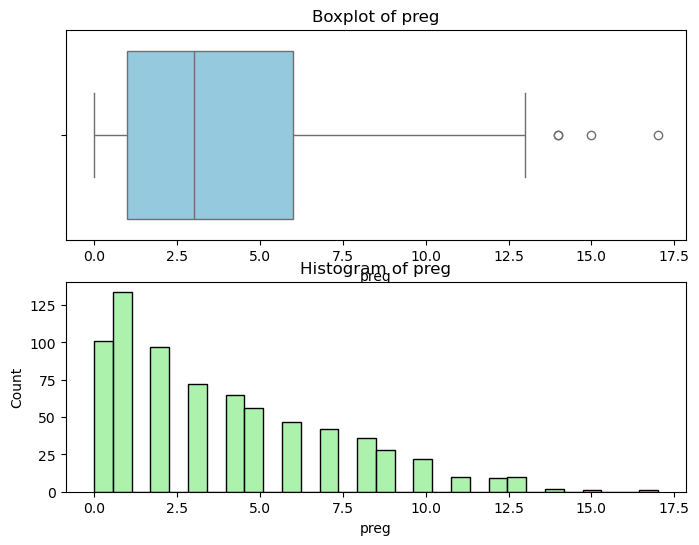

In [20]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Horizontal boxplot
sns.boxplot(x=df["preg"], ax=axes[0], color="skyblue", orient="h")
axes[0].set_title(f"Boxplot of {"preg"}")

# Histogram
sns.histplot(df["preg"], bins=30, kde=False, ax=axes[1], color="lightgreen")
axes[1].set_title(f"Histogram of {"preg"}")

Text(0.5, 1.0, 'Class-wise KDE plot for preg')

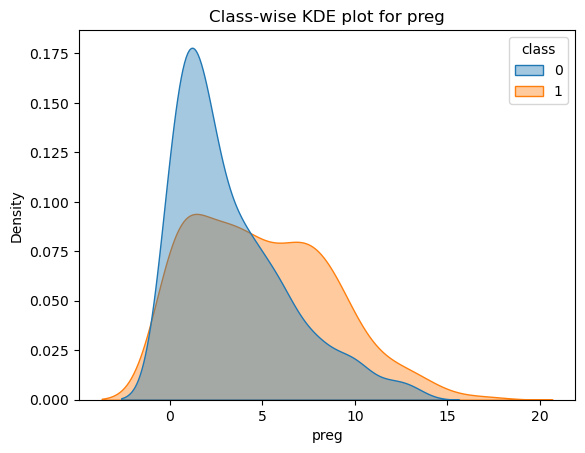

In [21]:
sns.kdeplot(data=df, x="preg", hue="class", fill=True, common_norm=False, alpha=0.4)
plt.title(f"Class-wise KDE plot for {"preg"}")

#### Inference
**It seems diabetes people have had more number of pregnencies in their lifetime.**

Text(0.5, 1.0, 'Histogram of plas')

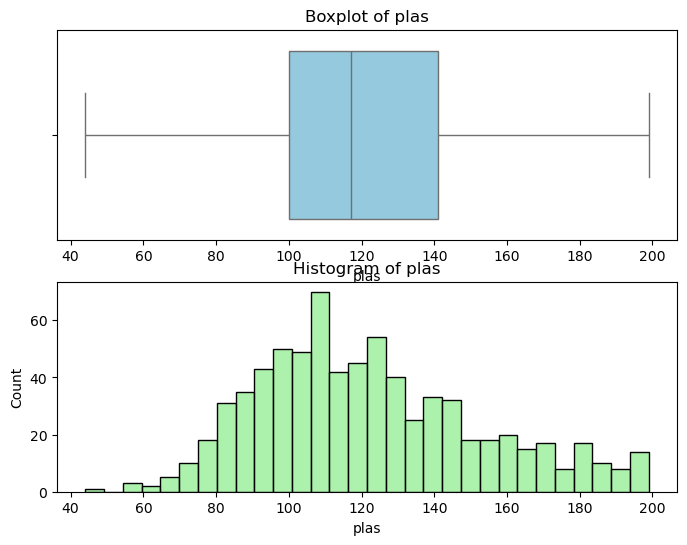

In [23]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Horizontal boxplot
sns.boxplot(x=df["plas"], ax=axes[0], color="skyblue", orient="h")
axes[0].set_title(f"Boxplot of {"plas"}")

# Histogram
sns.histplot(df["plas"], bins=30, kde=False, ax=axes[1], color="lightgreen")
axes[1].set_title(f"Histogram of {"plas"}")

Text(0.5, 1.0, 'Class-wise KDE plot for plas')

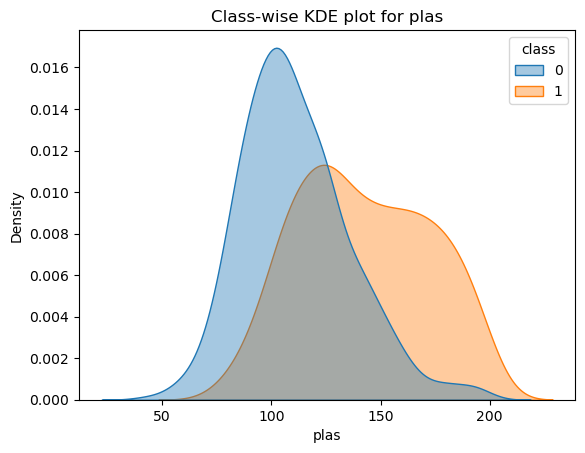

In [24]:

sns.kdeplot(data=df, x="plas", hue="class", fill=True, common_norm=False, alpha=0.4)
plt.title(f"Class-wise KDE plot for {"plas"}")

#### Inference
**It shows that people with high plasma glucose levels are having diabetes.**

Text(0.5, 1.0, 'Histogram of pres')

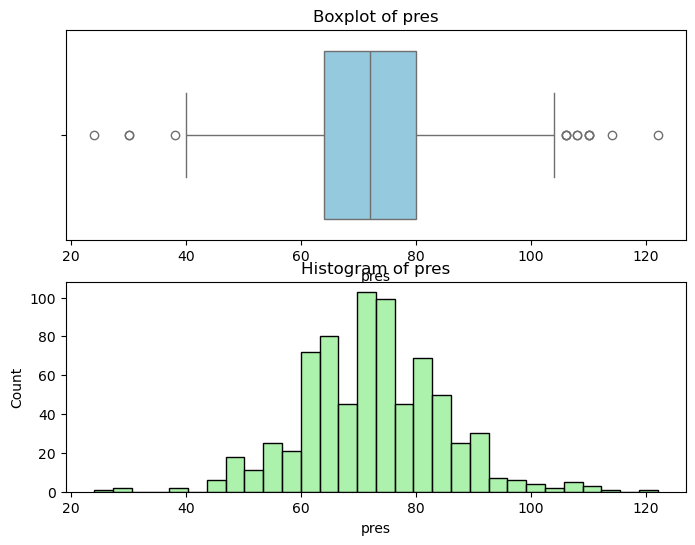

In [26]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Horizontal boxplot
sns.boxplot(x=df["pres"], ax=axes[0], color="skyblue", orient="h")
axes[0].set_title(f"Boxplot of {"pres"}")

# Histogram
sns.histplot(df["pres"], bins=30, kde=False, ax=axes[1], color="lightgreen")
axes[1].set_title(f"Histogram of {"pres"}")

Text(0.5, 1.0, 'Class-wise KDE plot for pres')

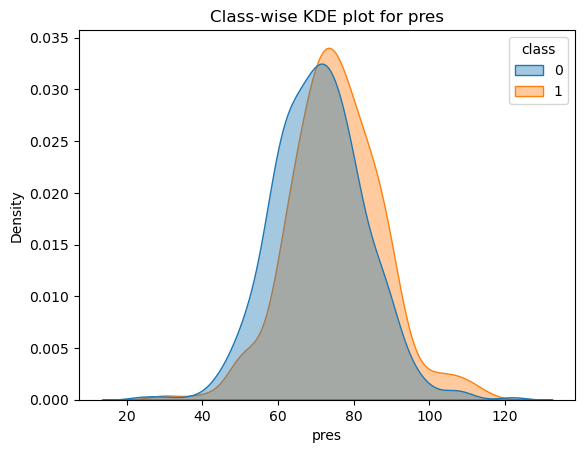

In [27]:
sns.kdeplot(data=df, x="pres", hue="class", fill=True, common_norm=False, alpha=0.4)
plt.title(f"Class-wise KDE plot for {"pres"}")

#### Inference
**It shows that high blood pressure and diabetes might  be  related**

Text(0.5, 1.0, 'Histogram of skin')

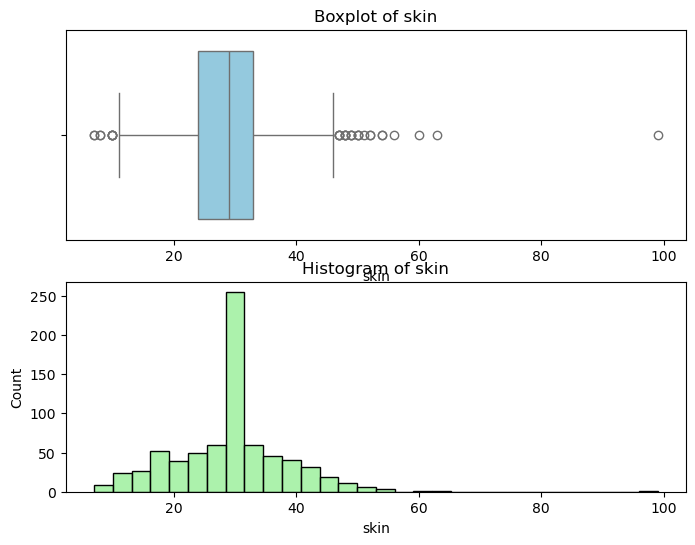

In [29]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Horizontal boxplot
sns.boxplot(x=df["skin"], ax=axes[0], color="skyblue", orient="h")
axes[0].set_title(f"Boxplot of {"skin"}")

# Histogram
sns.histplot(df["skin"], bins=30, kde=False, ax=axes[1], color="lightgreen")
axes[1].set_title(f"Histogram of {"skin"}")

Text(0.5, 1.0, 'Class-wise KDE plot for skin')

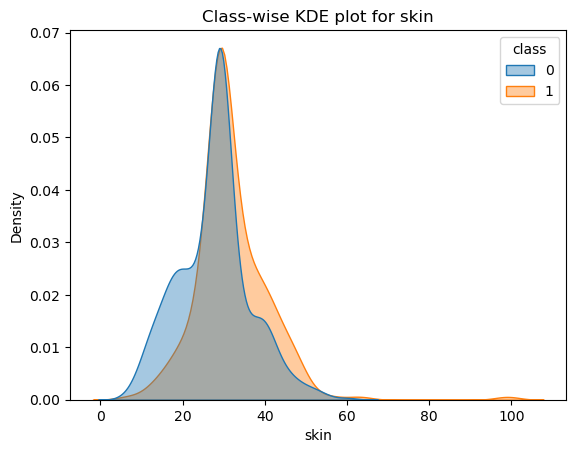

In [30]:
sns.kdeplot(data=df, x="skin", hue="class", fill=True, common_norm=False, alpha=0.4)
plt.title(f"Class-wise KDE plot for {"skin"}")

#### Inference
**It shows that skin thickness and diabetes might not be related**

Text(0.5, 1.0, 'Histogram of mass')

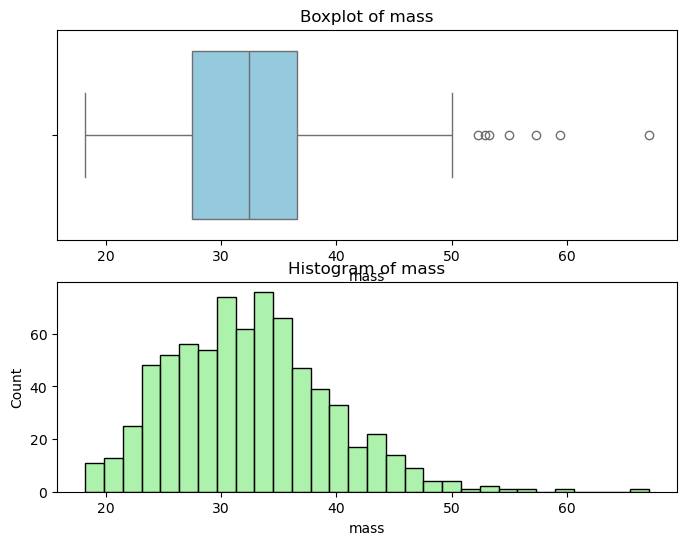

In [32]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Horizontal boxplot
sns.boxplot(x=df["mass"], ax=axes[0], color="skyblue", orient="h")
axes[0].set_title(f"Boxplot of {"mass"}")

# Histogram
sns.histplot(df["mass"], bins=30, kde=False, ax=axes[1], color="lightgreen")
axes[1].set_title(f"Histogram of {"mass"}")

Text(0.5, 1.0, 'Class-wise KDE plot for mass')

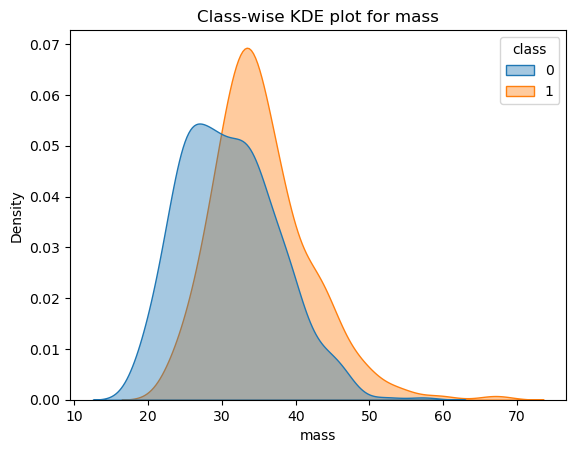

In [33]:
sns.kdeplot(data=df, x="mass", hue="class", fill=True, common_norm=False, alpha=0.4)
plt.title(f"Class-wise KDE plot for {"mass"}")

#### Inference
**It shows that Body Mass Index and  and diabetes appears to have some correlation**

Text(0.5, 1.0, 'Histogram of pedi')

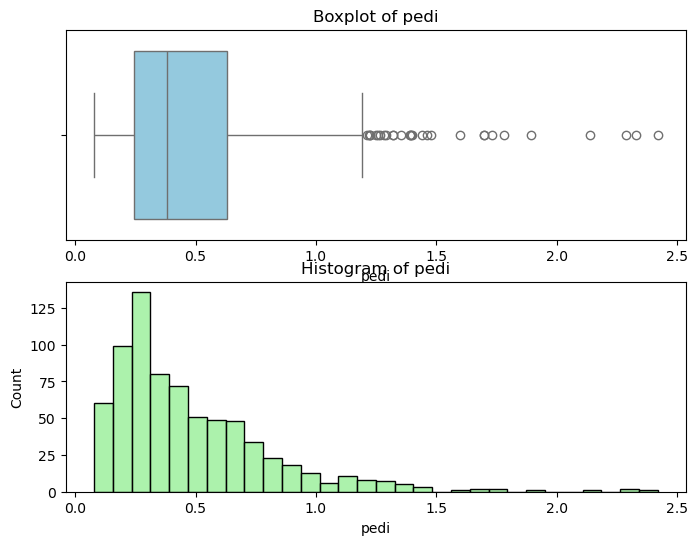

In [35]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Horizontal boxplot
sns.boxplot(x=df["pedi"], ax=axes[0], color="skyblue", orient="h")
axes[0].set_title(f"Boxplot of {"pedi"}")

# Histogram
sns.histplot(df["pedi"], bins=30, kde=False, ax=axes[1], color="lightgreen")
axes[1].set_title(f"Histogram of {"pedi"}")

Text(0.5, 1.0, 'Class-wise KDE plot for pedi')

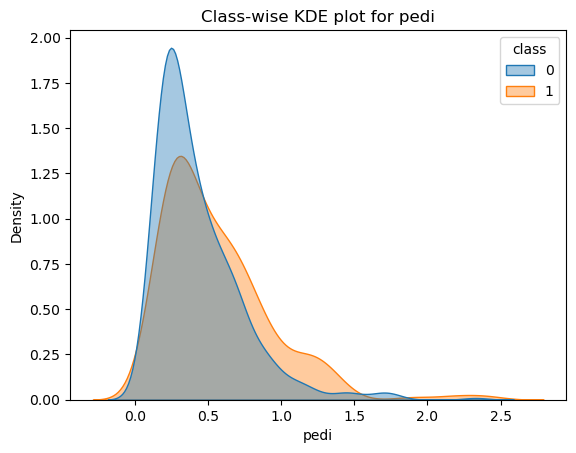

In [36]:
sns.kdeplot(data=df, x="pedi", hue="class", fill=True, common_norm=False, alpha=0.4)
plt.title(f"Class-wise KDE plot for {"pedi"}")

#### Inference
**It appears that pedigri functions does to have any significant effecton diabetes**

Text(0.5, 1.0, 'Histogram of age')

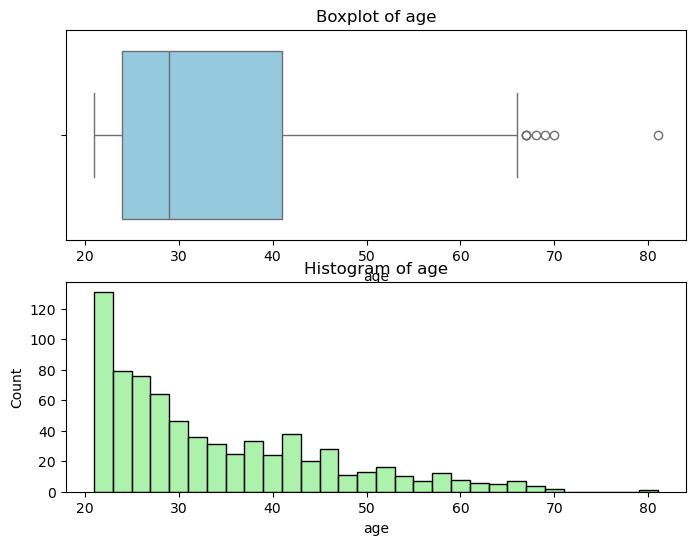

In [38]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Horizontal boxplot
sns.boxplot(x=df["age"], ax=axes[0], color="skyblue", orient="h")
axes[0].set_title(f"Boxplot of {"age"}")

# Histogram
sns.histplot(df["age"], bins=30, kde=False, ax=axes[1], color="lightgreen")
axes[1].set_title(f"Histogram of {"age"}")

Text(0.5, 1.0, 'Class-wise KDE plot for age')

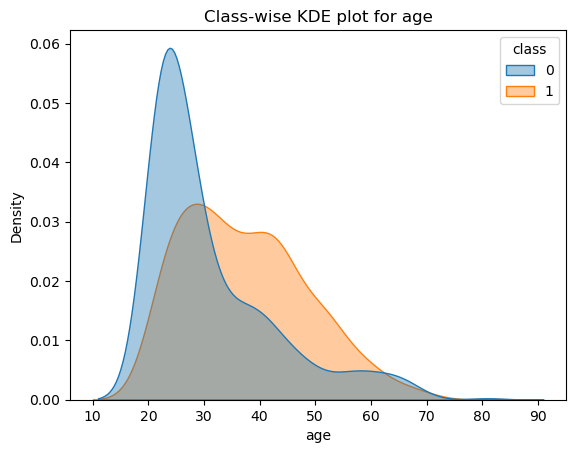

In [39]:
sns.kdeplot(data=df, x="age", hue="class", fill=True, common_norm=False, alpha=0.4)
plt.title(f"Class-wise KDE plot for {"age"}")

#### Inference
**Age appears  to have some significant effect on diabetes**

<Axes: xlabel='class'>

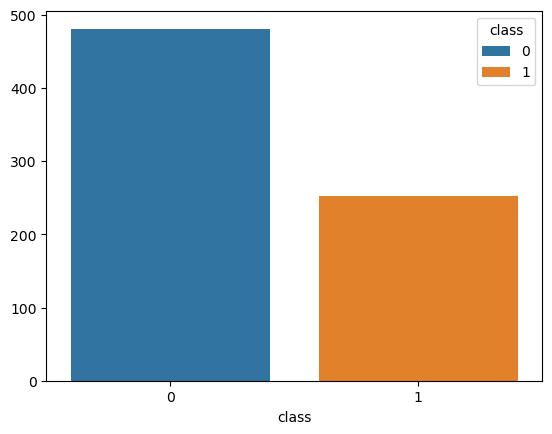

In [86]:
# Bar chart for class
counts = df2["class"].value_counts()
sns.barplot( x = counts.index, y= counts.values, hue = counts.index)